In [8]:
import pandas as pd

# Veriyi yükleyelim
file_path = 'C:/Users/aseli/Downloads/archive/dielectron.csv'  # Dosya yolunuzu buraya yazın
df = pd.read_csv(file_path)

# İlk birkaç satırı inceleyelim
df.head()


,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [10]:
# Veri setinde eksik değer var mı kontrol edelim
print(df.isnull().sum())

# Veri türlerini kontrol edelim
print(df.dtypes)

# Anlamlı olmayan sütunları kaldırma (örneğin Run, Event)
df_clean = df.drop(['Run', 'Event'], axis=1)

# Sayısal olmayan veriler için kodlama (varsa)
# Örneğin, kategorik sütunlar için etiketleme veya one-hot encoding


Run       0
Event     0
E1        0
px1       0
py1       0
pz1       0
pt1       0
eta1      0
phi1      0
Q1        0
E2        0
px2       0
py2       0
pz2       0
pt2       0
eta2      0
phi2      0
Q2        0
M        85
dtype: int64
Run        int64
Event      int64
E1       float64
px1      float64
py1      float64
pz1      float64
pt1      float64
eta1     float64
phi1     float64
Q1         int64
E2       float64
px2      float64
py2      float64
pz2      float64
pt2      float64
eta2     float64
phi2     float64
Q2         int64
M        float64
dtype: object


In [11]:
# Örnek: Yeni bir özellik oluşturalım (örneğin toplam momentum veya kütle)
df_clean['total_momentum'] = (df_clean['px1']**2 + df_clean['py1']**2 + df_clean['pz1']**2)**0.5 + \
                             (df_clean['px2']**2 + df_clean['py2']**2 + df_clean['pz2']**2)**0.5

# Kütle hesaplama (E = mc^2 formülü ile basit bir örnek)
df_clean['mass'] = (df_clean['E1']**2 + df_clean['E2']**2 - (df_clean['px1'] + df_clean['px2'])**2 - 
                    (df_clean['py1'] + df_clean['py2'])**2 - (df_clean['pz1'] + df_clean['pz2'])**2)**0.5


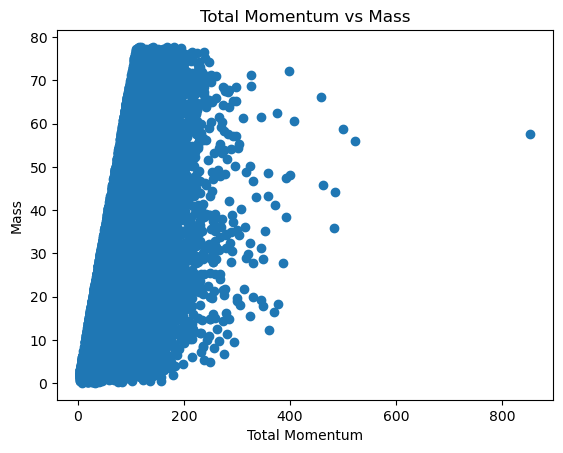

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot örneği: momentum vs kütle
plt.scatter(df_clean['total_momentum'], df_clean['mass'])
plt.title('Total Momentum vs Mass')
plt.xlabel('Total Momentum')
plt.ylabel('Mass')
plt.show()


In [17]:
from sklearn.model_selection import train_test_split

# Hedef (target) ve özellikler (features)
X = df_clean.drop(['M'], axis=1)  # M (kütle) hedef değişkenimiz
y = df_clean['M']

# Eğitim ve test setine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Eksik verileri sütunların ortalamaları ile doldurma
df_clean = df_clean.fillna(df_clean.mean())

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(df_clean.drop(['M'], axis=1), df_clean['M'], test_size=0.2, random_state=42)

# Modeli tekrar eğitme
model.fit(X_train, y_train)


LinearRegression()

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Modeli tanımla ve eğit
model = LinearRegression()
model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yap
y_pred = model.predict(X_test)

# Model değerlendirme metrikleri
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")


MAE: 3.642335731836
MSE: 33.03062497545484
RMSE: 5.7472275903651875
R2: 0.9511732849453826


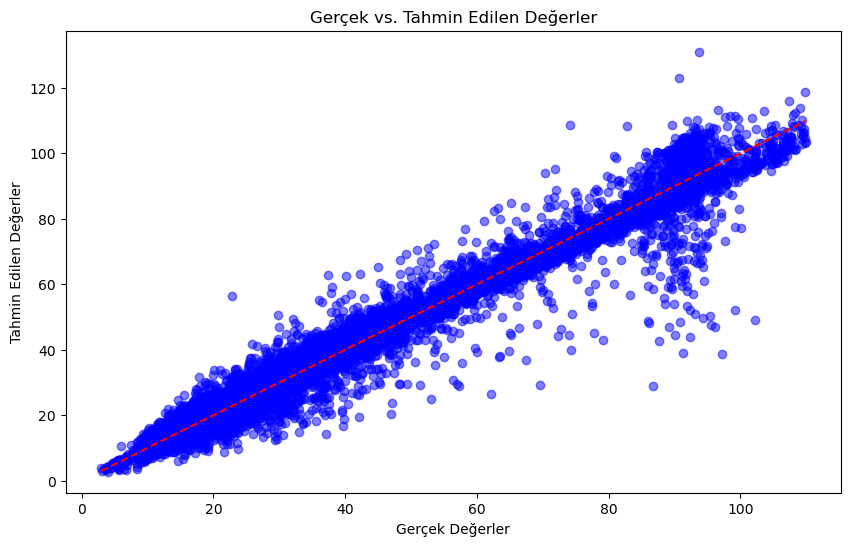

In [20]:
import matplotlib.pyplot as plt

# Gerçek ve tahmin edilen değerleri al
y_pred = model.predict(X_test)

# Grafik
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.show()


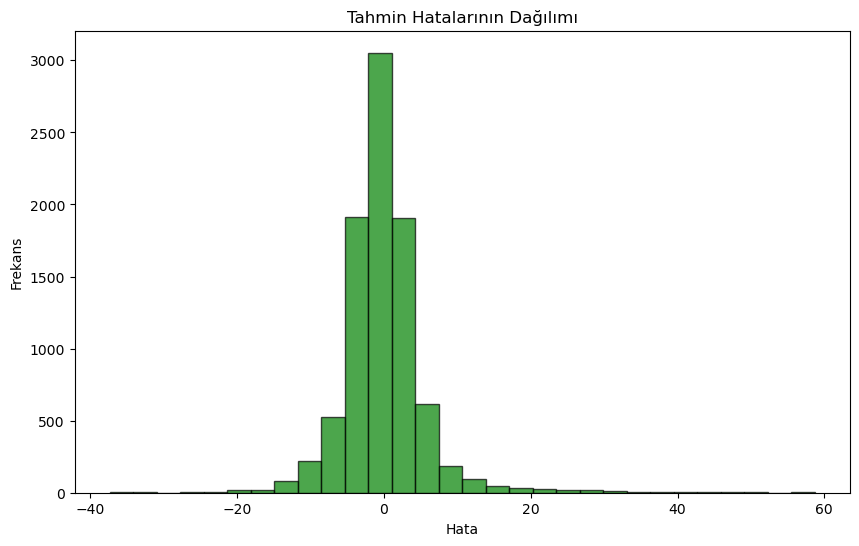

In [21]:
# Hata hesapla
errors = y_test - y_pred

# Hata dağılımı
plt.figure(figsize=(10,6))
plt.hist(errors, bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title('Tahmin Hatalarının Dağılımı')
plt.xlabel('Hata')
plt.ylabel('Frekans')
plt.show()


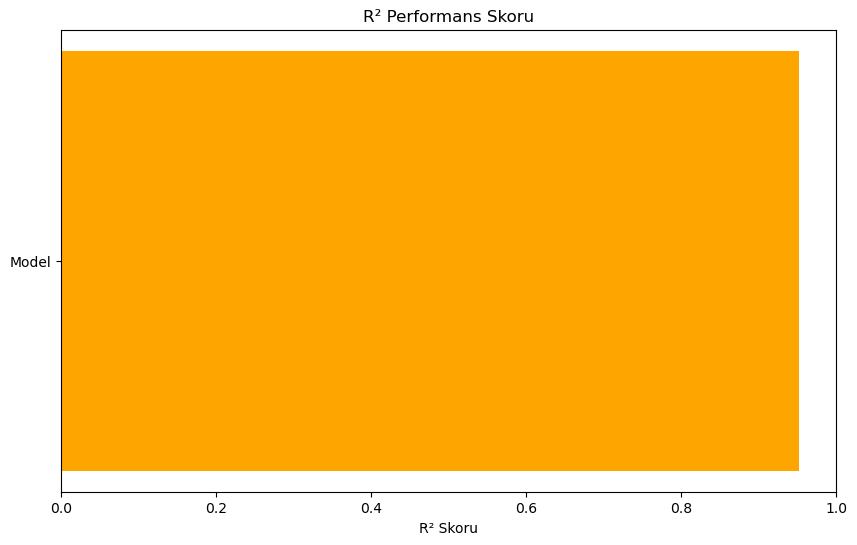

In [22]:
# Modelin R² skoru
r2_score = model.score(X_test, y_test)

# R² skoru
plt.figure(figsize=(10,6))
plt.barh(['Model'], [r2_score], color='orange')
plt.title('R² Performans Skoru')
plt.xlabel('R² Skoru')
plt.xlim(0, 1)
plt.show()


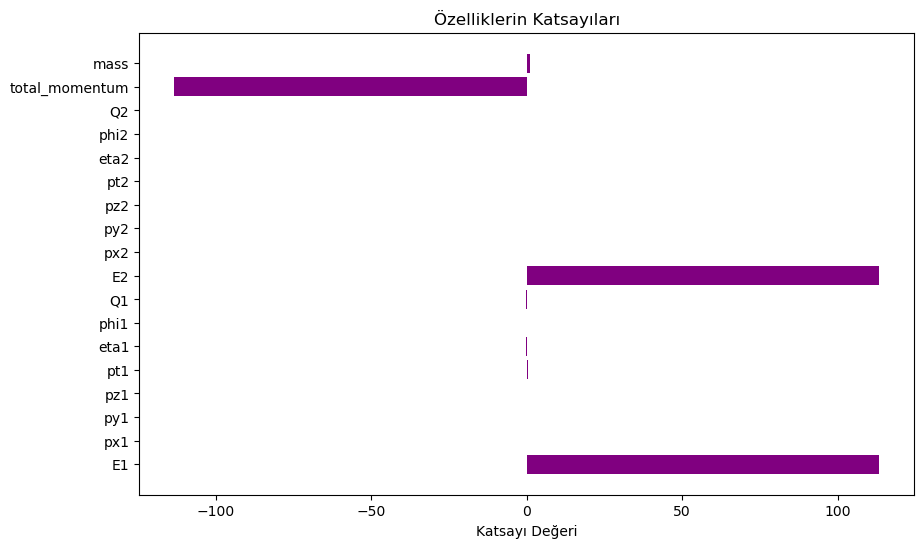

In [23]:
# Katsayılar
coefficients = model.coef_

# Özellikler ile katsayılar arasındaki ilişkiyi görselleştirelim
plt.figure(figsize=(10,6))
plt.barh(X_train.columns, coefficients, color='purple')
plt.title('Özelliklerin Katsayıları')
plt.xlabel('Katsayı Değeri')
plt.show()


# First develop

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

print("Ridge Model R²:", ridge_model.score(X_test_scaled, y_test))


In [26]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

print("Lasso Model R²:", lasso_model.score(X_test_scaled, y_test))


Lasso Model R²: 0.9512949265378994


In [27]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("XGBoost Model R²:", xgb_model.score(X_test_scaled, y_test))


XGBoost Model R²: 0.9981184268377926


In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.1, 1.0, 10.0],  # Ridge veya Lasso için
}

grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'alpha': 1.0}


In [30]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train_scaled, y_train, cv=5)


array([0.94915636, 0.94456527, 0.95228673, 0.95227159, 0.95047571])

# We'll move on XGBoost

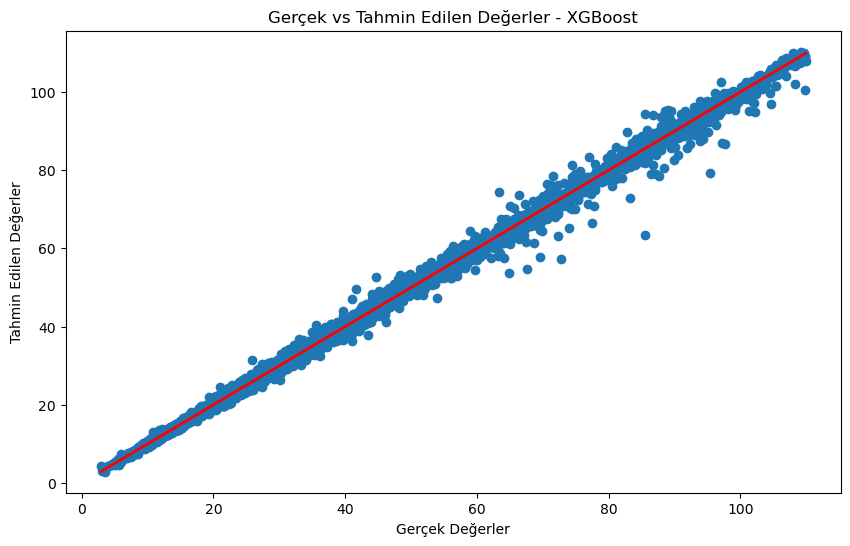

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_xgb)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek vs Tahmin Edilen Değerler - XGBoost")
plt.show()


# Stacking

In [33]:
# Ridge Modeli
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

print(f"Ridge Model R²: {ridge_model.score(X_test_scaled, y_test)}")

# XGBoost Modeli
import xgboost as xgb
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

print(f"XGBoost Model R²: {xgb_model.score(X_test_scaled, y_test)}")


Ridge Model R²: 0.9511772834973002
XGBoost Model R²: 0.9981184268377926


In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_xgb = GridSearchCV(xgb.XGBRegressor(), param_grid, cv=5)
grid_search_xgb.fit(X_train_scaled, y_train)
print(f"Best Hyperparameters for XGBoost: {grid_search_xgb.best_params_}")


Best Hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [35]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# Farklı modelleri oluştur
models = [
    ('ridge', Ridge(alpha=1.0)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBRegressor())
]

# Stacking modelini oluştur
stacking_model = StackingRegressor(estimators=models, final_estimator=Ridge())

# Modeli eğit
stacking_model.fit(X_train_scaled, y_train)

# Tahmin yap
y_pred_stacking = stacking_model.predict(X_test_scaled)

# R²
print(f"Stacking Model R²: {stacking_model.score(X_test_scaled, y_test)}")


Stacking Model R²: 0.9983304947084022


In [36]:
xgb_optimized = xgb.XGBRegressor(
    learning_rate=0.1,
    max_depth=7,
    n_estimators=200
)
xgb_optimized.fit(X_train_scaled, y_train)
y_pred_opt = xgb_optimized.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred_opt)
mse = mean_squared_error(y_test, y_pred_opt)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_opt)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 0.5140107880919718
MSE: 0.8411420017639243
RMSE: 0.9171379404233173
R²: 0.9987566023691311


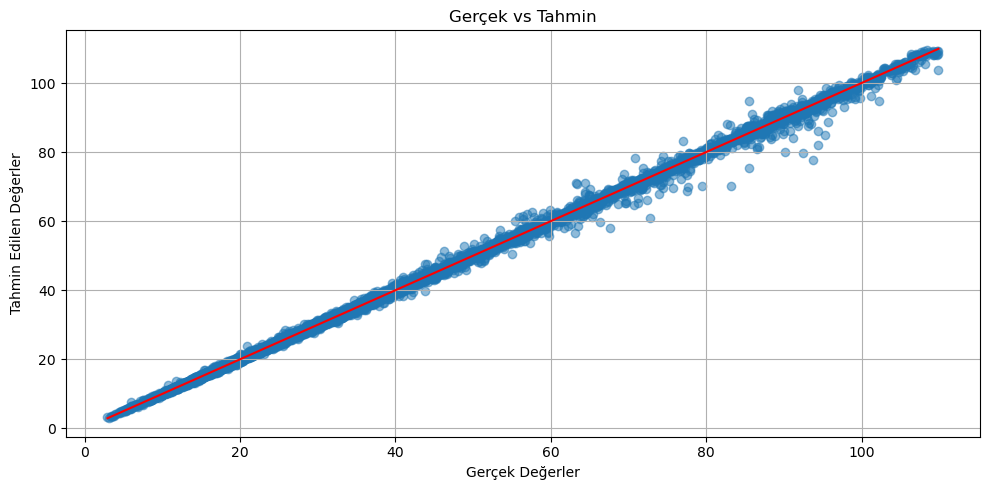

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_opt, alpha=0.5)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek vs Tahmin")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")  # 1:1 çizgisi
plt.grid(True)
plt.tight_layout()
plt.show()


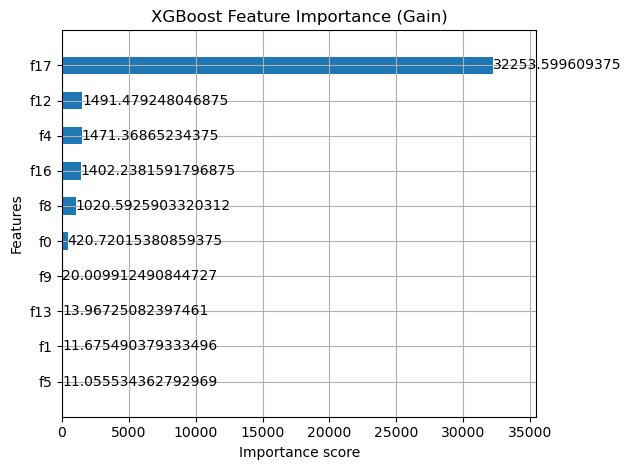

In [39]:
xgb.plot_importance(xgb_optimized, height=0.5, importance_type='gain', max_num_features=10)
plt.title("XGBoost Feature Importance (Gain)")
plt.tight_layout()
plt.show()


In [40]:
pip install shap


   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 545.2/545.2 kB 9.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 20.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   -------- ------------------------------- 6.8/30.3 MB 34.9 MB/s eta 0:00:01
   ----------------- ---------------------- 13.6/30.3 MB 32.9 MB/s eta 0:00:01
   --------------------------- ------------ 21.0/30.3 MB 33.1 MB/s eta 0:00:01
   --------------------------------- ------ 25.7/30.3 MB 30.1 MB/s eta 0:00:01
   ---------------------------------------- 30.3/30.3 MB 29.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


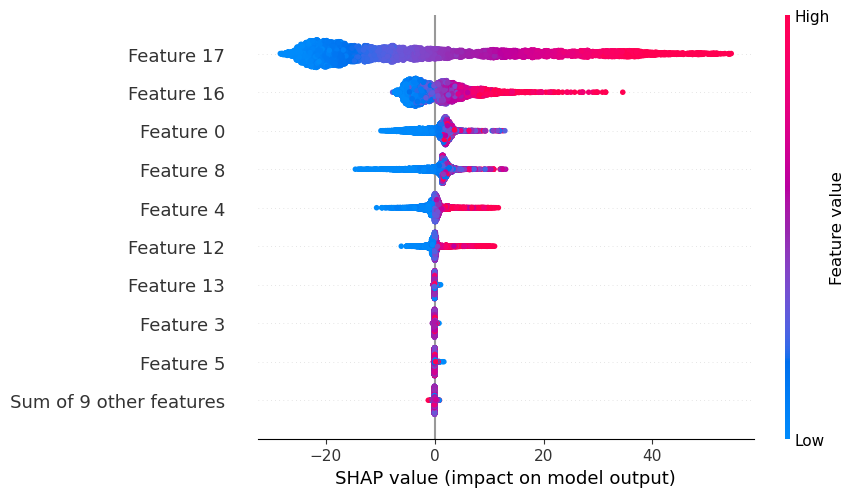

In [42]:
import shap

# SHAP değerlerini hesapla
explainer = shap.Explainer(xgb_optimized)
shap_values = explainer(X_test_scaled)

# Özet grafiği (en önemli değişkenleri gösterir)
shap.plots.beeswarm(shap_values, max_display=10)


# Anomali Tespiti ve Fiziksel Yorum

In [43]:
# Tahmin ve artıklar (residuals)
y_pred = xgb_model.predict(X_test_scaled)
residuals = y_test - y_pred


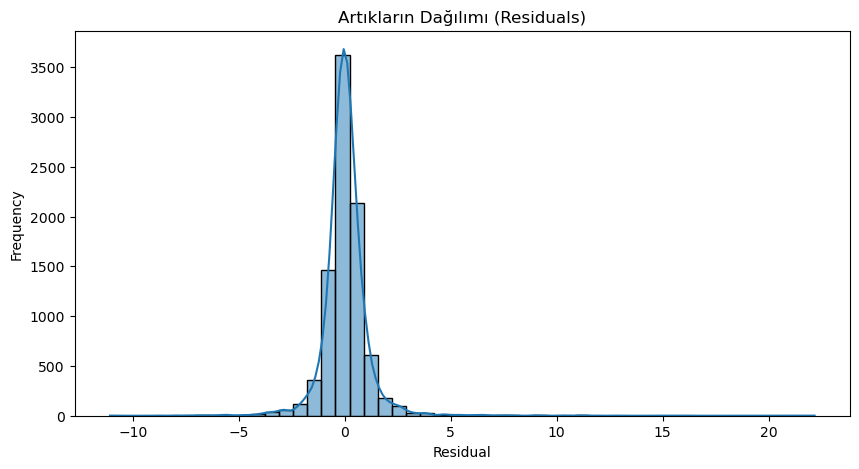

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Artıkların Dağılımı (Residuals)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()


In [45]:
import numpy as np

residuals_mean = np.mean(residuals)
residuals_std = np.std(residuals)

# Z-score hesapla
z_scores = (residuals - residuals_mean) / residuals_std

# 3 standart sapmadan büyük olanlar anomali
threshold = 3
anomaly_indices = np.where(np.abs(z_scores) > threshold)[0]

print(f"Toplam {len(anomaly_indices)} anomali bulundu.")


Toplam 143 anomali bulundu.


In [46]:
# X_test_scaled zaten scale edilmişti, şimdi orijinal feature'larla eşle
import pandas as pd

X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_df["residuals"] = residuals.values
X_test_df["z_score"] = z_scores.values
X_test_df["y_true"] = y_test.values
X_test_df["y_pred"] = y_pred

anomalies = X_test_df.iloc[anomaly_indices]
anomalies.head()


,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,...,pt2,eta2,phi2,Q2,total_momentum,mass,residuals,z_score,y_true,y_pred
46,-0.348508,0.405889,-1.239223,0.189889,0.254125,0.334646,-0.698336,-0.993055,1.203849,-0.692005,...,0.147380,-1.434721,1.191006,1.007679,0.862556,0.879216,4.017107,3.534559,71.9182,67.901093
85,2.023505,0.589027,1.989220,2.290828,1.104118,1.471039,0.704925,1.006994,-0.321358,-0.531885,...,0.967761,-0.141292,-1.023037,-0.992380,1.297225,1.398265,3.818561,3.358510,89.4556,85.637039
102,-0.698602,-0.317753,-0.445245,0.006276,-0.583713,0.014930,-1.212832,1.006994,1.615327,0.926400,...,0.294823,-1.473412,0.433518,1.007679,0.974629,-0.611706,-8.036100,-7.152916,41.6052,49.641300
232,-0.107536,-1.321305,-1.516415,-0.127737,1.006997,-0.142014,-1.272494,-0.993055,-0.211140,0.500077,...,-0.399710,1.177692,0.404384,-0.992380,-0.284733,0.078107,-3.574490,-3.196845,49.7607,53.335190
274,0.066660,0.981830,-2.215725,-0.163538,1.474561,-0.148648,-0.645434,1.006994,1.844880,-0.393917,...,1.135263,-1.239966,0.955477,-0.992380,1.797193,-0.750065,9.011438,7.962989,87.5897,78.578262


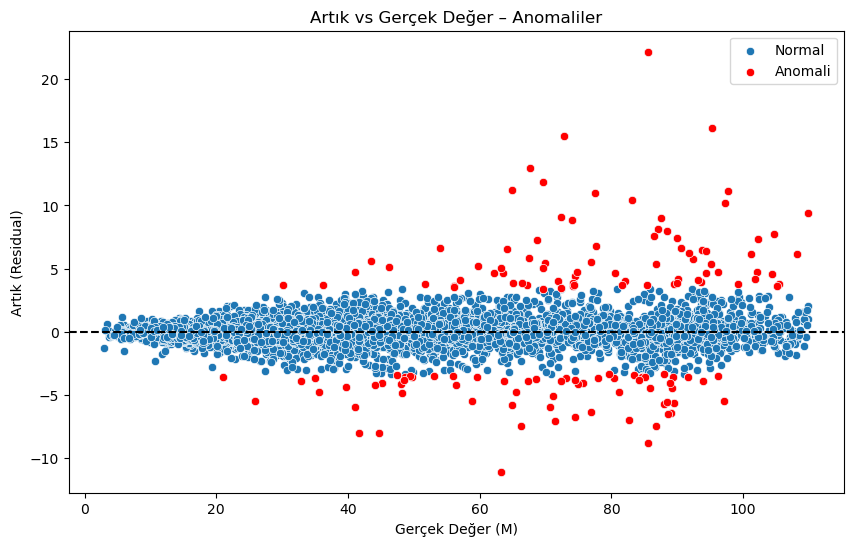

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="y_true", y="residuals", data=X_test_df, label="Normal")
sns.scatterplot(x="y_true", y="residuals", data=anomalies, color="red", label="Anomali")
plt.axhline(0, color='black', linestyle='--')
plt.title("Artık vs Gerçek Değer – Anomaliler")
plt.xlabel("Gerçek Değer (M)")
plt.ylabel("Artık (Residual)")
plt.legend()
plt.show()


# Feature Engineering

In [48]:
df["delta_eta"] = np.abs(df["eta1"] - df["eta2"])
df["delta_phi"] = np.abs(df["phi1"] - df["phi2"])
df["delta_R"] = np.sqrt(df["delta_eta"]**2 + df["delta_phi"]**2)
df["total_pt"] = df["pt1"] + df["pt2"]
df["charge_product"] = df["Q1"] * df["Q2"]


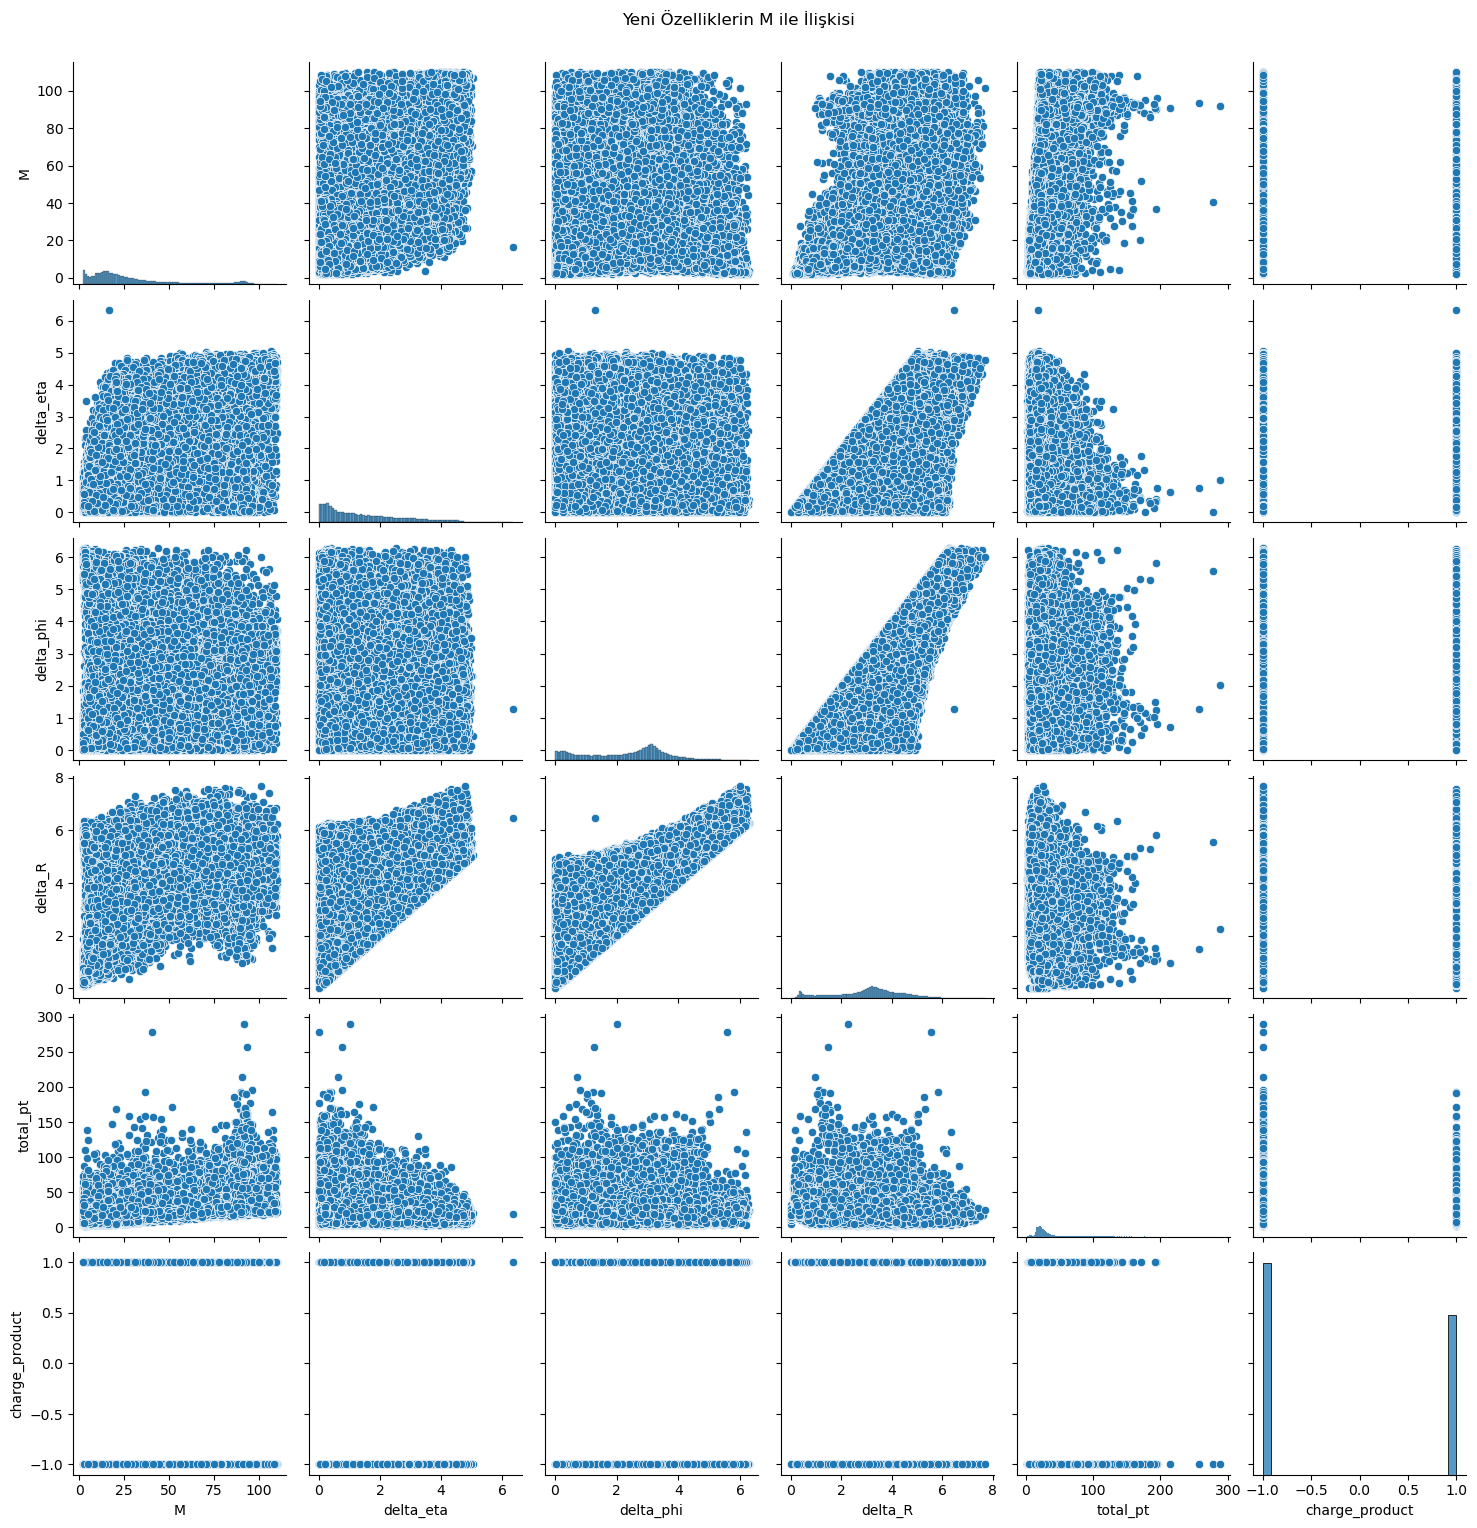

In [49]:
import seaborn as sns

sns.pairplot(df[["M", "delta_eta", "delta_phi", "delta_R", "total_pt", "charge_product"]])
plt.suptitle("Yeni Özelliklerin M ile İlişkisi", y=1.02)
plt.show()


In [50]:
df["same_charge"] = (df["Q1"] == df["Q2"]).astype(int)


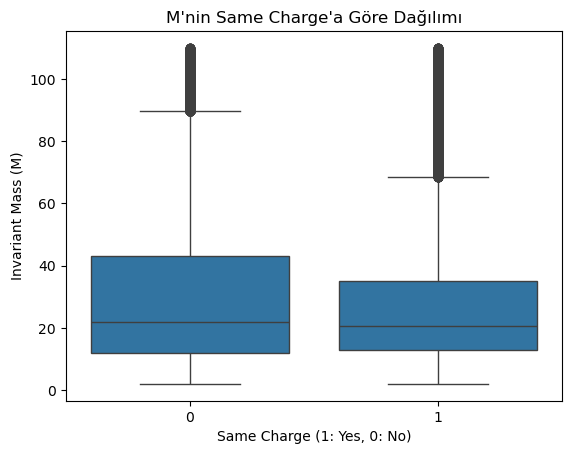

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="same_charge", y="M", data=df)
plt.title("M'nin Same Charge'a Göre Dağılımı")
plt.xlabel("Same Charge (1: Yes, 0: No)")
plt.ylabel("Invariant Mass (M)")
plt.show()


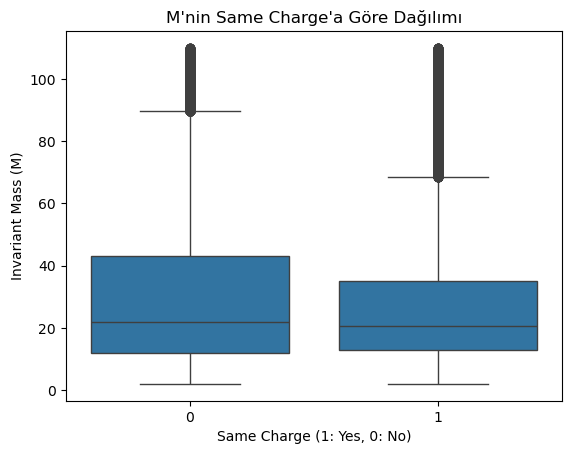

<Figure size 640x480 with 0 Axes>

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="same_charge", y="M", data=df)
plt.title("M'nin Same Charge'a Göre Dağılımı")
plt.xlabel("Same Charge (1: Yes, 0: No)")
plt.ylabel("Invariant Mass (M)")
plt.show()
plt.savefig(f'image_3.png')


In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [54]:
from xgboost import XGBRegressor

xgb_model_new = XGBRegressor(learning_rate=0.1, max_depth=7, n_estimators=200)
xgb_model_new.fit(X_train_scaled, y_train)

from sklearn.metrics import r2_score, mean_absolute_error

y_pred = xgb_model_new.predict(X_test_scaled)

print("Yeni Model R²:", r2_score(y_test, y_pred))
print("Yeni MAE:", mean_absolute_error(y_test, y_pred))


Yeni Model R²: 0.9987566023691311
Yeni MAE: 0.5140107880919718


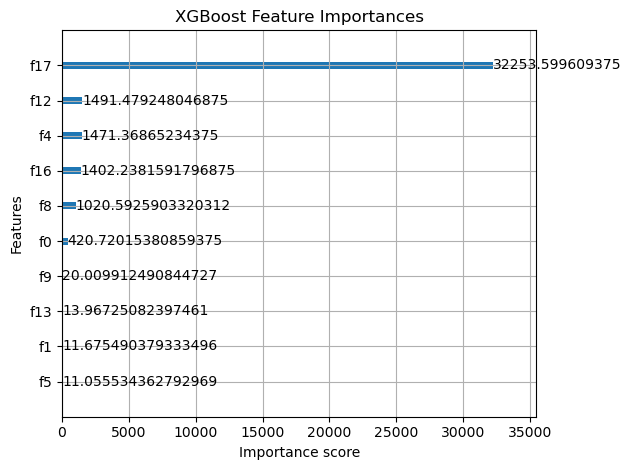

In [55]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(xgb_model_new, importance_type='gain', max_num_features=10)
plt.title("XGBoost Feature Importances")
plt.tight_layout()
plt.show()


100%|===================| 8817/8825 [01:45<00:00]        

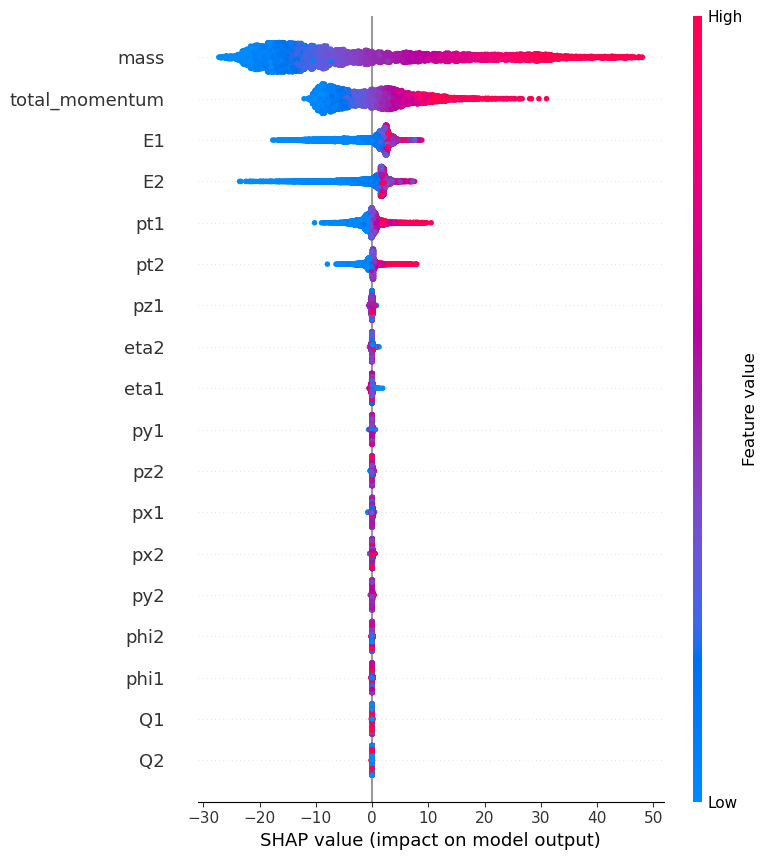

<Figure size 640x480 with 0 Axes>

In [71]:
import shap

features = X_train.columns  # Eğer X_train bir DataFrame ise
explainer = shap.Explainer(xgb_model_new, X_train_scaled)
shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values, X_test, feature_names=features)
plt.savefig(f'image_2.png')

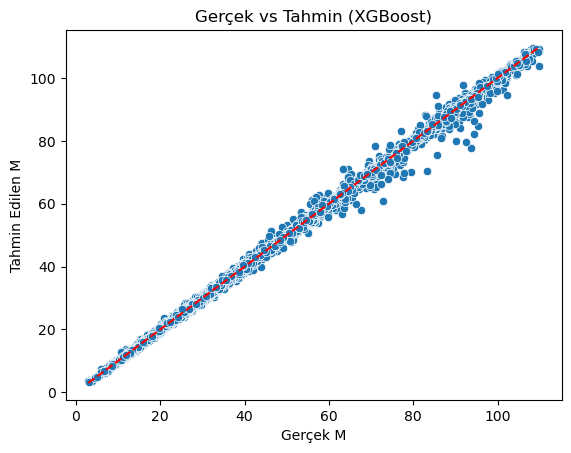

<Figure size 640x480 with 0 Axes>

In [70]:
import seaborn as sns

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Gerçek M")
plt.ylabel("Tahmin Edilen M")
plt.title("Gerçek vs Tahmin (XGBoost)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # referans çizgisi
plt.show()
plt.savefig(f'image_1.png')
